<a href="https://colab.research.google.com/github/st064560/my_python/blob/master/site_conv_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Shopping stage - CID.csv')
df.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Этап покупки,Cid,Дата,Сеансы
0,(other),(other),(other),29182538
1,ALL_VISITS,104443087.1585809236,20200402,107
2,NO_SHOPPING_ACTIVITY,913930248.1549569160,20190304,98
3,ALL_VISITS,355900195.1549635786,20190321,59
4,NO_SHOPPING_ACTIVITY,104443087.1585809236,20200402,56
5,NO_CART_ADDITION,104443087.1585809236,20200402,51
6,PRODUCT_VIEW,104443087.1585809236,20200402,51
7,ALL_VISITS,289013726.1549253662,20190204,40
8,NO_SHOPPING_ACTIVITY,289013726.1549253662,20190204,40
9,ALL_VISITS,71868501.1569838721,20191001,39


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Этап покупки  object
 1   Cid           object
 2   Дата          object
 3   Сеансы        int64 
dtypes: int64(1), object(3)
memory usage: 91.6+ MB


In [10]:
df = df.drop([0, 1])

In [11]:
df['Дата'].astype('int')

2          20190304
3          20190321
4          20200402
5          20200402
6          20200402
             ...   
2999995    20190128
2999996    20200120
2999997    20190918
2999998    20190706
2999999    20190113
Name: Дата, Length: 2999998, dtype: int64

In [12]:
date = df['Дата']


df['Дата'] = pd.to_datetime(date, format='%Y%m%d')

df.head(5)

,Этап покупки,Cid,Дата,Сеансы
2,NO_SHOPPING_ACTIVITY,913930248.1549569160,2019-03-04,98
3,ALL_VISITS,355900195.1549635786,2019-03-21,59
4,NO_SHOPPING_ACTIVITY,104443087.1585809236,2020-04-02,56
5,NO_CART_ADDITION,104443087.1585809236,2020-04-02,51
6,PRODUCT_VIEW,104443087.1585809236,2020-04-02,51


In [13]:
df['Этап покупки'].value_counts()

ALL_VISITS                        1121527
NO_SHOPPING_ACTIVITY               853611
PRODUCT_VIEW                       286742
NO_CART_ADDITION                   240754
ADD_TO_CART                         75705
CART_ABANDONMENT                    54655
ADD_TO_CART_WITH_VIEW               51441
NO_PRODUCT_VIEW                     33833
ADD_TO_CART_WITHOUT_VIEW            30345
CHECKOUT                            30290
CHECKOUT_1                          28175
CHECKOUT_WITH_CART_ADDITION         26182
CHECKOUT_3                          22125
CHECKOUT_4                          21527
CHECKOUT_2                          20472
CHECKOUT_ABANDONMENT                20182
CHECKOUT_5                          16739
CHECKOUT_6                          12993
TRANSACTION                         11991
CHECKOUT_3_WITHOUT_CHECKOUT_2       10592
CHECKOUT_2_ABANDONMENT               8294
CHECKOUT_4_ABANDONMENT               6054
CHECKOUT_WITHOUT_CART_ADDITION       5738
CHECKOUT_5_ABANDONMENT            

In [14]:
df.duplicated()

2          False
3          False
4          False
5          False
6          False
           ...  
2999995    False
2999996    False
2999997    False
2999998    False
2999999    False
Length: 2999998, dtype: bool

In [15]:
df = df.rename(columns={"Этап покупки": "category", "Cid": "ID",  "Дата": "date",  "Сеансы": "perf"})

In [16]:
df['name'] = df['ID'].astype('category').cat.codes 
df.head(5)

,category,ID,date,perf,name
2,NO_SHOPPING_ACTIVITY,913930248.1549569160,2019-03-04,98,1327949
3,ALL_VISITS,355900195.1549635786,2019-03-21,59,1304912
4,NO_SHOPPING_ACTIVITY,104443087.1585809236,2020-04-02,56,1261157
5,NO_CART_ADDITION,104443087.1585809236,2020-04-02,51,1261157
6,PRODUCT_VIEW,104443087.1585809236,2020-04-02,51,1261157


In [29]:
df['name'] = df['name'].astype(int)

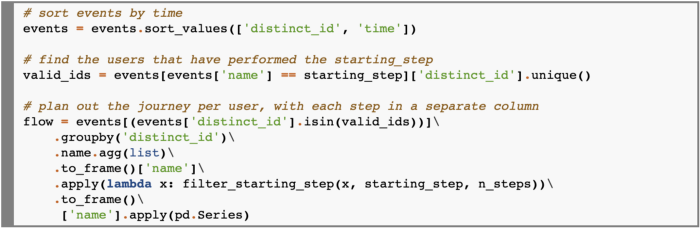![image.png]()

In [76]:
steps = ['NO_SHOPPING_ACTIVITY', 'PRODUCT_VIEW', 'ADD_TO_CART', 'TRANSACTION']

df = df[['category', 'name', 'date']]
df = df[df['category'].isin(steps)]

## add to cart

In [30]:
add_cart = df[(df['category'] == 'ADD_TO_CART')]



In [42]:
checkout = df[(df['category'] == 'CHECKOUT')]

In [51]:
trans = df[(df['category'] == 'TRANSACTION')]

In [31]:
add_cart.head(5)

,category,ID,date,perf,name
18,ADD_TO_CART,179036098.1586201787,2020-04-29,33,1274565
47,ADD_TO_CART,166369034.1592641490,2020-06-23,22,1271833
55,ADD_TO_CART,92069149.1591600199,2020-07-07,21,1328317
62,ADD_TO_CART,77546642.1593466055,2020-07-08,20,1321088
134,ADD_TO_CART,128778281.1575318222,2020-05-28,15,1264790


In [52]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

In [54]:
mn = trans.copy()

In [55]:
mn['order_month'] = mn['date'].dt.to_period('M')
mn['cohort'] = mn.groupby('name')['date'] \
                 .transform('min') \
                 .dt.to_period('M') 

mn

,category,ID,date,perf,name,order_month,cohort
26729,TRANSACTION,567833161.1594130904,2020-07-07,4,1315200,2020-07,2020-07
26730,TRANSACTION,600231561.1580971983,2020-02-06,4,1317597,2020-02,2020-02
77505,TRANSACTION,104490249.1571841927,2019-10-31,3,1261181,2019-10,2019-10
77506,TRANSACTION,156285686.1582640042,2020-04-02,3,1269882,2020-04,2020-04
77507,TRANSACTION,43142530.1582616941,2020-02-25,3,1309793,2020-02,2020-02
...,...,...,...,...,...,...,...
2999901,TRANSACTION,9.99012e+07,2020-05-27,1,244534,2020-05,2020-05
2999902,TRANSACTION,9.99012e+07,2020-05-30,1,244534,2020-05,2020-05
2999903,TRANSACTION,9.99254e+07,2019-10-25,1,244612,2019-10,2019-10
2999904,TRANSACTION,9.99431e+08,2020-06-21,1,1246130,2020-06,2020-06


In [56]:
mn_cohort = mn.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('name', 'nunique')) \
              .reset_index(drop=False)
mn_cohort['period_number'] = (mn_cohort.order_month - mn_cohort.cohort).apply(attrgetter('n'))
mn_cohort

,cohort,order_month,n_customers,period_number
0,2019-01,2019-01,496,0
1,2019-01,2019-02,21,1
2,2019-01,2019-03,21,2
3,2019-01,2019-04,21,3
4,2019-01,2019-05,15,4
...,...,...,...,...
176,2020-05,2020-06,28,1
177,2020-05,2020-07,7,2
178,2020-06,2020-06,763,0
179,2020-06,2020-07,14,1


In [57]:

cohort_pivot = mn_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

cohort_pivot
cohort_pivot.to_excel('transaction_abs.xlsx')

In [58]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [59]:
retention_matrix.to_excel('transaction_perc.xlsx')

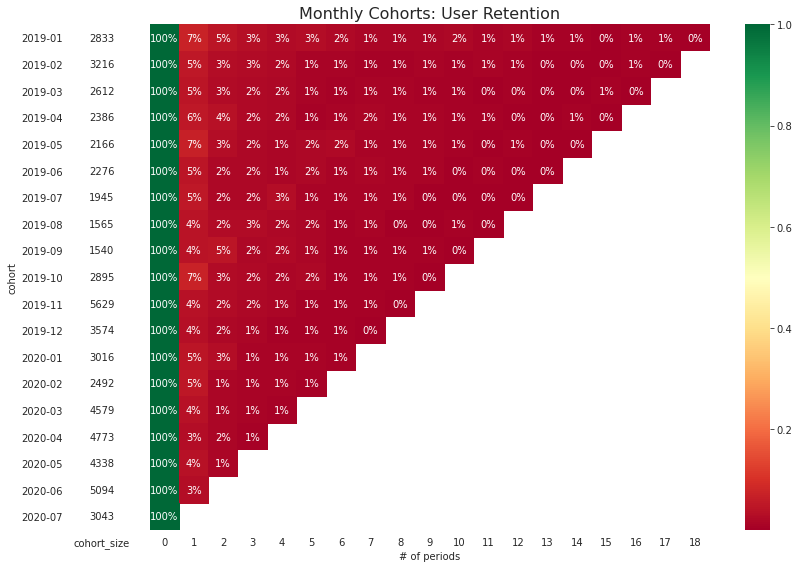

In [40]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

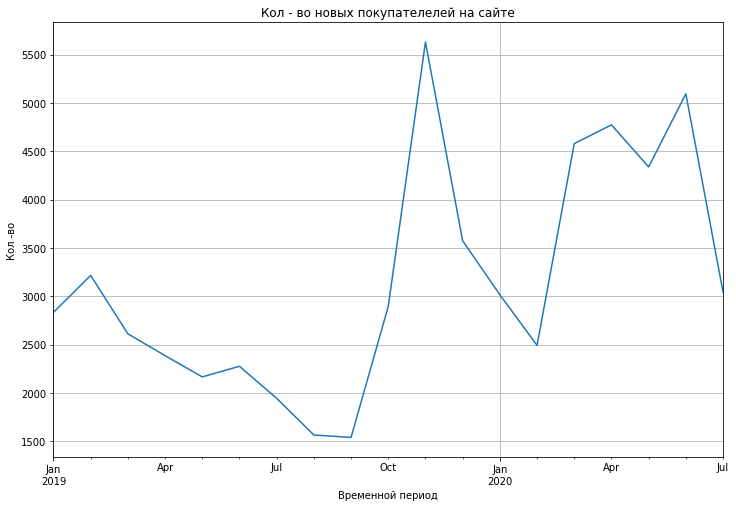

In [41]:
cohort_size.plot(title='Кол - во новых покупателелей на сайте', figsize=(12, 8))

# после вызова метода .plot() явно
# задаем подписи осей x и y


plt.xlabel('Временной период')
plt.ylabel('Кол -во')
plt.grid(True)